# House Price Prediction

This is part of my internship at InfoTech Progidy. The first task is to "Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms"

The General workflow followed is as follows :

1) Problem Definition
2) Data
3) Evaluation
4) Features
5) Modelling
6) Experimentation


## 1) Problem Definition

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west road. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With the 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

More about the problem on : https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

## 2) Data

The dataset required is taken from Kaggle : https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

### Dataset Description :

**File descriptions**
* train.csv - the training set
* test.csv - the test set
* data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here
* sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

**Data fields**
Here's a brief version of what you'll find in the data description file.

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

## 3) Evaluation :

Now let's begin working with our data

In [1]:
# Importing the necessary EDA libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset 
df = pd.read_csv("data/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
df.isna().sum().value_counts()

0       62
81       5
37       3
38       2
259      1
1369     1
872      1
8        1
1        1
690      1
1453     1
1179     1
1406     1
Name: count, dtype: int64

In [7]:
df.isna().sum().value_counts().sum() - 62

19

In [10]:
missing_count = df.isna().sum().value_counts().sum() - 62
print(f"Number of columns with missing values : {missing_count}")

Number of columns with missing values : 19


In [12]:
df["SalePrice"].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

<Axes: ylabel='Frequency'>

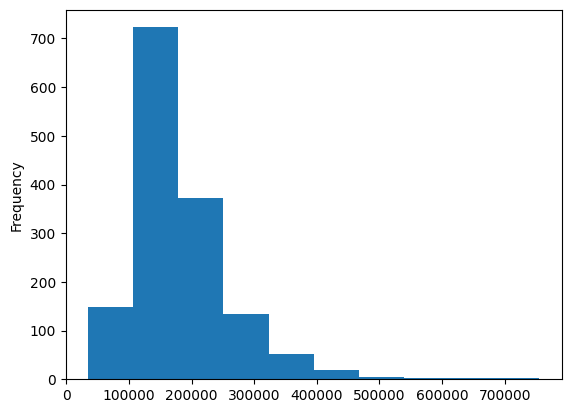

In [15]:
df["SalePrice"].plot(kind="hist")

In [16]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [18]:
for label, content in df.items() :
    if pd.api.types.is_string_dtype(content) :
        print(label)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
ExterQual
ExterCond
Foundation
Heating
HeatingQC
CentralAir
KitchenQual
Functional
PavedDrive
SaleType
SaleCondition


In [19]:
for label, content in df.items() :
    if pd.api.types.is_object_dtype(content) :
        print(label)

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [22]:
for label, content in df.items() :
    if pd.api.types.is_numeric_dtype(content) :
        print(label)

Id
MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice


In [23]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [24]:
df.dtypes.value_counts()

object     43
int64      35
float64     3
Name: count, dtype: int64

**So only integer, float and object datatypes are there**

We just need to convert the object attributes into catgorical attributes

First let's make a copy of the original dataframe though, hence we don't lose our data.

In [26]:
df_tmp = df.copy()

In [27]:
for label, content in df_tmp.items() :
    if pd.api.types.is_object_dtype(content) :
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [29]:
df_tmp.dtypes

Id                  int64
MSSubClass          int64
MSZoning         category
LotFrontage       float64
LotArea             int64
                   ...   
MoSold              int64
YrSold              int64
SaleType         category
SaleCondition    category
SalePrice           int64
Length: 81, dtype: object

In [30]:
df_tmp.dtypes.value_counts()

int64       35
category     5
category     3
float64      3
category     2
category     2
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
Name: count, dtype: int64

So all attributes are now either numeric or categorical, hence ready for building models. 

**Now let's check for any missing values.**

In [31]:
df_tmp.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [39]:
df_tmp.isna().sum().value_counts()

0       65
81       4
37       3
38       2
1369     1
872      1
1        1
690      1
1453     1
1179     1
1406     1
Name: count, dtype: int64

In [41]:
# For numeric attributes, let's fill all the missing value with the attribute median
for label, content in df_tmp.items() :
    if pd.api.types.is_numeric_dtype(content) :
        if df_tmp[label].isna().sum() > 0 :
            df_tmp.fillna(df_tmp[label].median(), inplace=True)

In [42]:
# For categorical attributes, let's first turn the categories into numbers and then add +1
for label, content in df_tmp.items() :
    if not pd.api.types.is_numeric_dtype(content) :
        df_tmp[label] = pd.Categorical(df[label]).codes + 1

In [43]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int8   
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int8   
 6   Alley          1460 non-null   int8   
 7   LotShape       1460 non-null   int8   
 8   LandContour    1460 non-null   int8   
 9   Utilities      1460 non-null   int8   
 10  LotConfig      1460 non-null   int8   
 11  LandSlope      1460 non-null   int8   
 12  Neighborhood   1460 non-null   int8   
 13  Condition1     1460 non-null   int8   
 14  Condition2     1460 non-null   int8   
 15  BldgType       1460 non-null   int8   
 16  HouseStyle     1460 non-null   int8   
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [44]:
df_tmp.isna().sum().value_counts()

0    81
Name: count, dtype: int64

In [46]:
len(df_tmp.columns)

81

So all the missing values have been removed !! So we can now begin working on building the model

In [47]:
df_tmp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,4,65.0,8450,2,0,4,4,1,...,0,0,0,0,0,2,2008,9,5,208500
1,2,20,4,80.0,9600,2,0,4,4,1,...,0,0,0,0,0,5,2007,9,5,181500
2,3,60,4,68.0,11250,2,0,1,4,1,...,0,0,0,0,0,9,2008,9,5,223500
3,4,70,4,60.0,9550,2,0,1,4,1,...,0,0,0,0,0,2,2006,9,1,140000
4,5,60,4,84.0,14260,2,0,1,4,1,...,0,0,0,0,0,12,2008,9,5,250000


## 5) Modelling :

Since the value to be predicted is a numeric value, it is a regression problem. It is specifically mentioned in the question that we use Linear Regression model. But for the sake of satisfaction, let's try out differnet Regression Models.

In [49]:
## First let's split the dataset into x and y
x = df_tmp.drop(["Id", "SalePrice"], axis=1)

In [50]:
y = df_tmp["SalePrice"]

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [54]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1168, 79), (292, 79), (1168,), (292,))

In [55]:
model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [56]:
y_preds = model.predict(x_test)

In [57]:
y_test, y_preds

(892     154500
 1105    325000
 413     115000
 522     159000
 1036    315500
          ...  
 479      89471
 1361    260000
 802     189000
 651     108000
 722     124500
 Name: SalePrice, Length: 292, dtype: int64,
 array([ 149528.77669079,  329345.51667631,  110430.97429418,
         176044.82420515,  311942.16896927,   79922.37380328,
         228882.82475744,  141405.97494417,   78738.54843603,
         155814.40094416,  143481.84000135,  106554.20184478,
          86373.21507484,  210353.17414555,  159471.82192913,
         137502.56095674,  208834.39420074,  124076.45587298,
         116633.14669843,  232699.3276679 ,  139950.83373476,
         209128.22454676,  186558.17053948,  118336.95939142,
         215635.72806773,  162148.47926833,  204406.36927278,
          74028.72800504,  165358.33819959,  199192.61180488,
         158789.00947205,  263695.5930294 ,  201052.15124944,
          98609.43165086,  250302.42640444,  150306.04949982,
         123362.6263451 ,  213685.2

In [58]:
mean_squared_error(y_test, y_preds)

1381412922.7921798

In [59]:
np.sqrt(mean_squared_error(y_test, y_preds))

37167.36367826187

<Axes: >

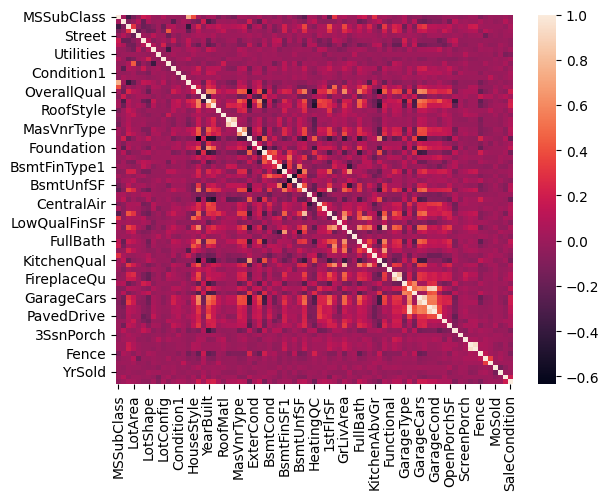

In [70]:
sns.heatmap(x.corr())

In [72]:
model.coef_

array([-7.12967646e+01, -2.36405738e+03, -1.76388943e+02,  3.60414461e-01,
        2.92068506e+04, -2.40603464e+03, -9.87570776e+02,  9.16417596e+02,
       -4.74006410e+04,  4.21437117e+01,  9.07279286e+03,  3.85798972e+02,
       -2.04061892e+02, -1.27941308e+04, -2.40060825e+03, -6.00334578e+02,
        9.83391798e+03,  5.85451193e+03,  2.59219446e+02,  6.14242900e+01,
        1.16926688e+03,  4.30990643e+03, -1.48071272e+03,  1.02991666e+03,
       -2.62200220e+03,  3.13040393e+01, -8.97879395e+03,  3.73435124e+02,
        1.45323869e+02, -8.42822861e+03,  3.23418995e+03, -2.54517512e+03,
        4.55134669e+02,  9.69178979e+00,  2.41590327e+03,  1.14717362e+01,
       -4.02835543e+00,  1.71351710e+01, -6.83472859e+02, -2.22622970e+02,
        1.47213447e+03, -6.27034648e+02,  2.26264158e+01,  2.34021229e+01,
       -2.87579331e+01,  1.72706054e+01,  5.13904391e+03, -4.04196120e+03,
        7.89102079e+02, -1.09572584e+03, -3.45549286e+03, -1.97967337e+04,
       -7.96543656e+03,  

<BarContainer object of 79 artists>

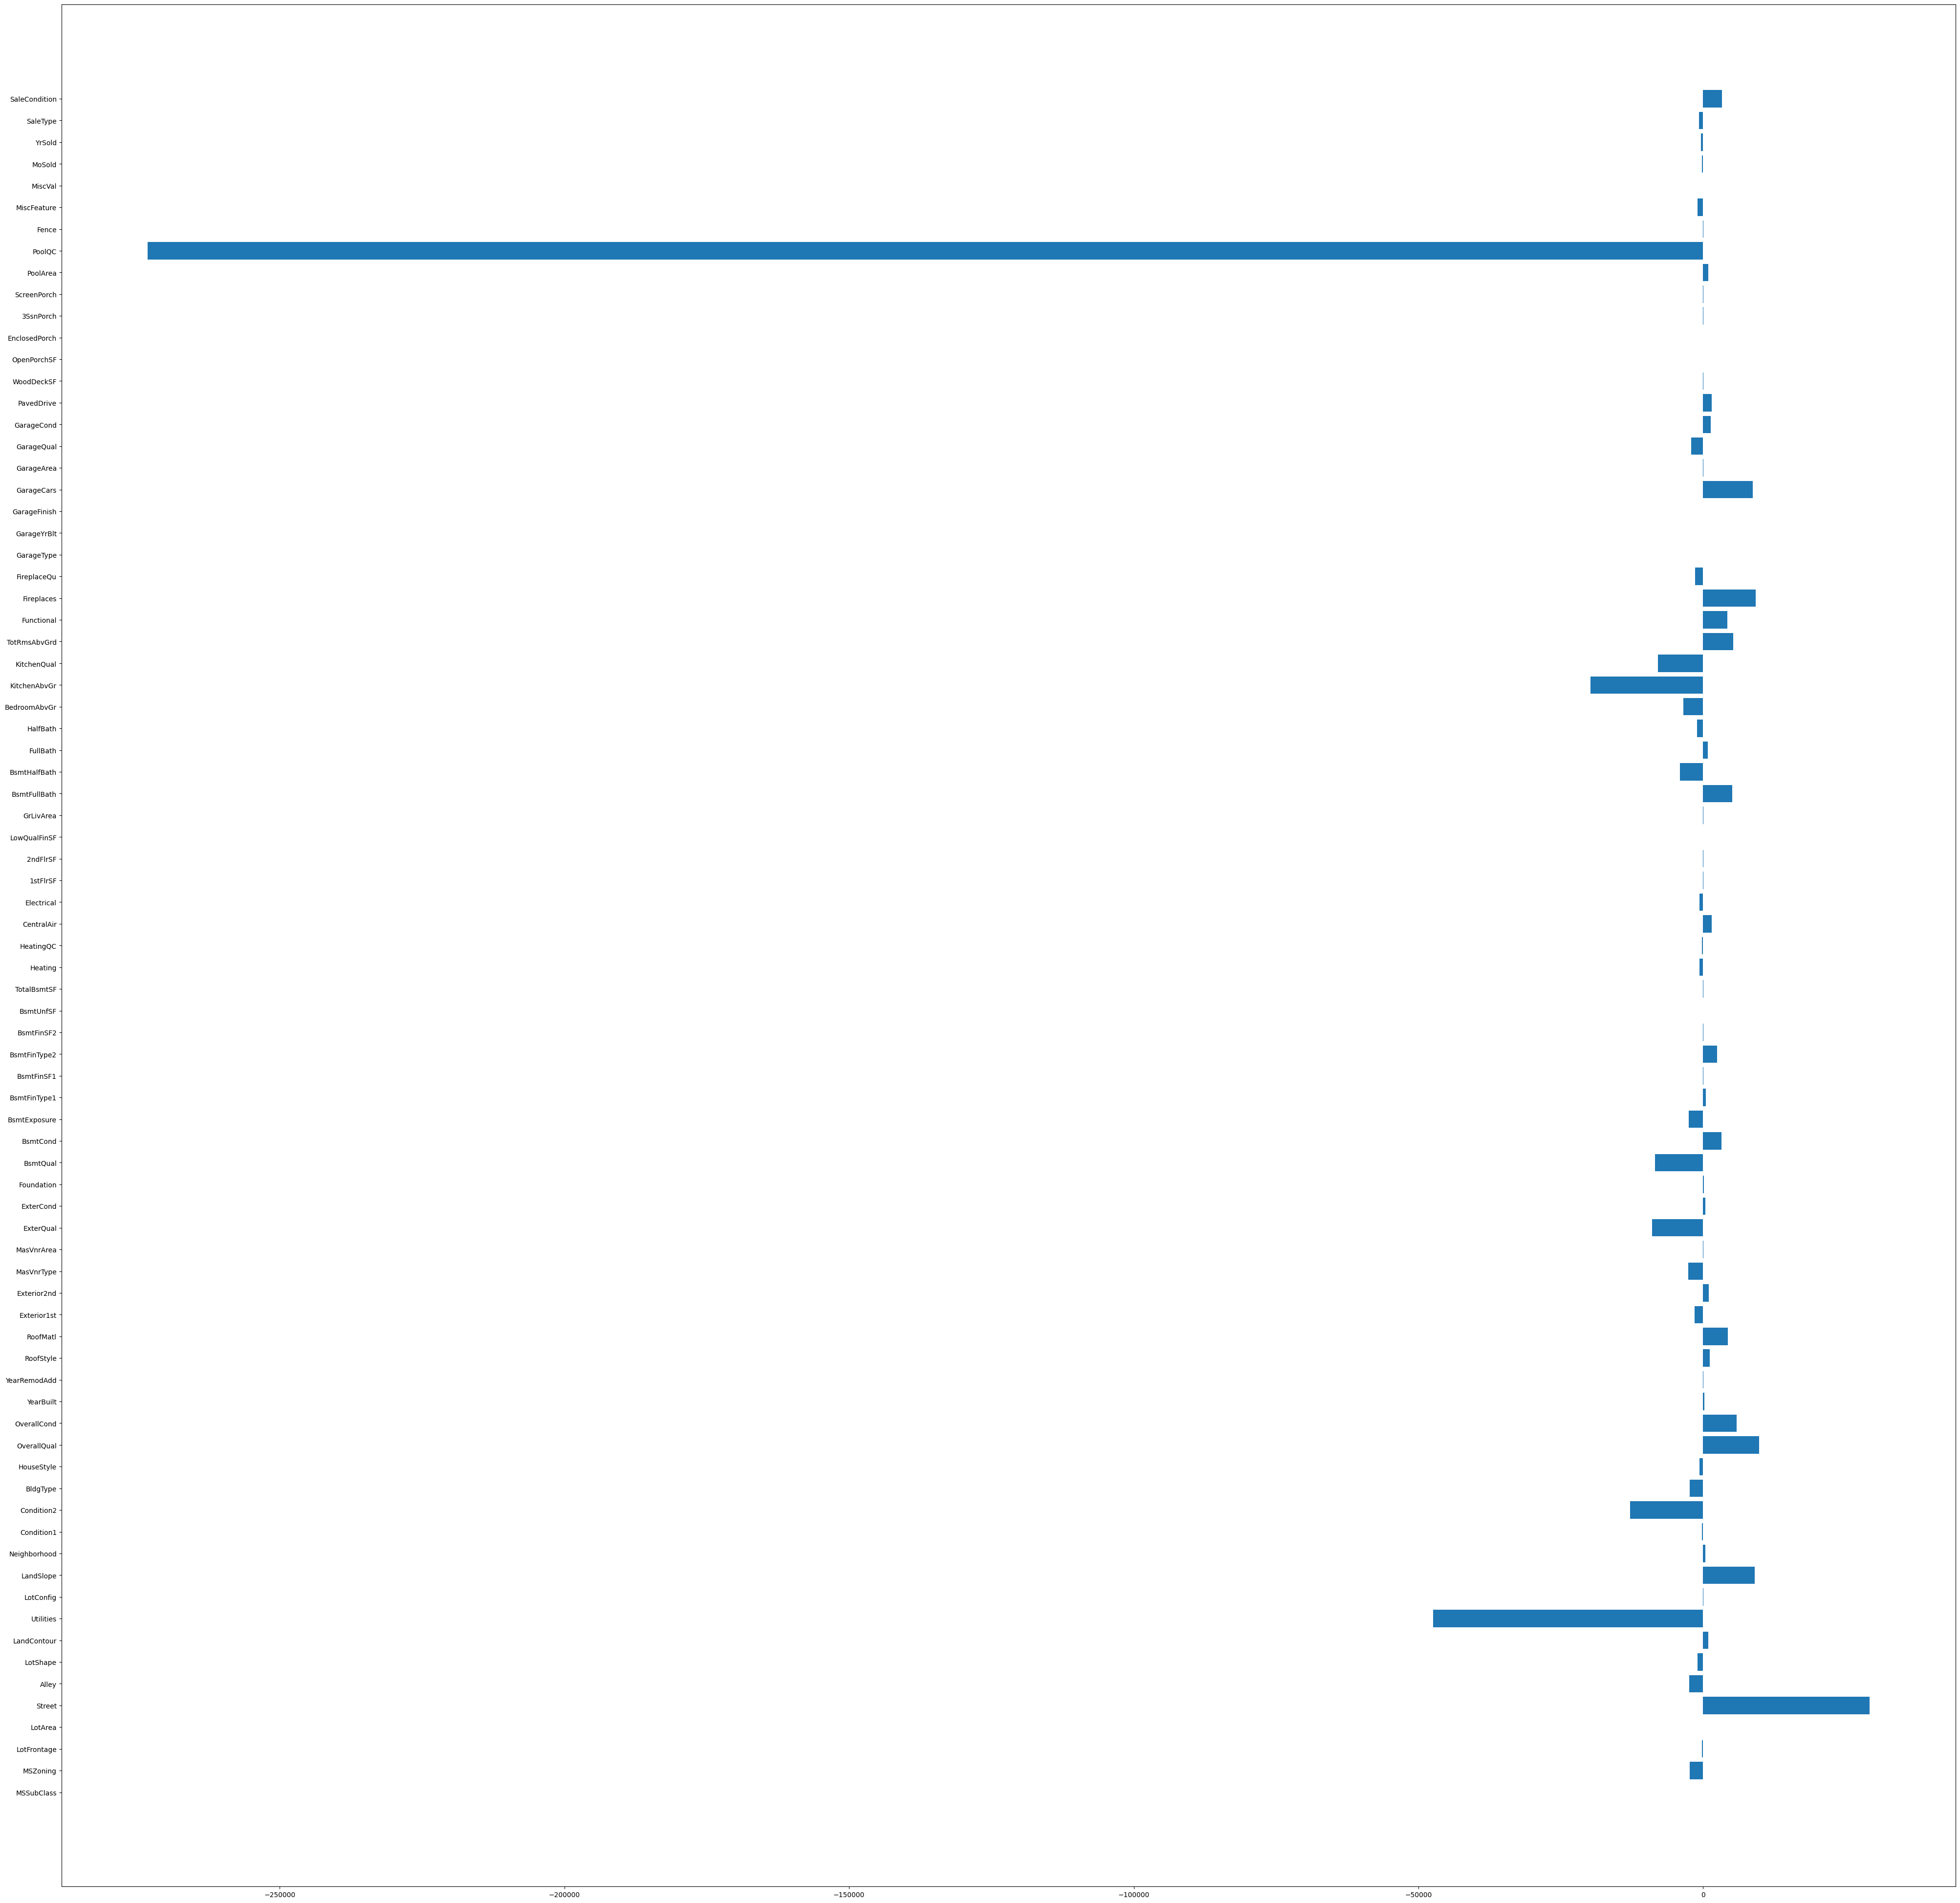

In [78]:
fig, ax = plt.subplots(figsize=(50, 50))
ax.barh(x.columns, model.coef_)

In [79]:
model.score(x_test, y_test)

0.8199016723046549

In [86]:
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [93]:
grid = {
    "fit_intercept" : [True, False],
    "n_jobs" : [None, 1, 5, 10],
    "positive" : [True, False],
    "copy_X" : [True, False],
}

In [94]:
best_model = RandomizedSearchCV(model,
                                param_distributions = grid,
                                cv = 5,
                                verbose = 2)
best_model.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END copy_X=False, fit_intercept=False, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=False, fit_intercept=False, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=False, fit_intercept=False, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=False, fit_intercept=False, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=False, fit_intercept=False, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=False, fit_intercept=True, n_jobs=5, positive=True; total time=   0.0s
[CV] END copy_X=False, fit_intercept=True, n_jobs=5, positive=True; total time=   0.0s
[CV] END copy_X=False, fit_intercept=True, n_jobs=5, positive=True; total time=   0.0s
[CV] END copy_X=False, fit_intercept=True, n_jobs=5, positive=True; total time=   0.0s
[CV] END copy_X=False, fit_intercept=True, n_jobs=5, positive=True; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_

RandomizedSearchCV(cv=5, estimator=LinearRegression(),
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'n_jobs': [None, 1, 5, 10],
                                        'positive': [True, False]},
                   verbose=2)

In [95]:
best_model.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__copy_X': True,
 'estimator__fit_intercept': True,
 'estimator__n_jobs': None,
 'estimator__positive': False,
 'estimator': LinearRegression(),
 'n_iter': 10,
 'n_jobs': None,
 'param_distributions': {'fit_intercept': [True, False],
  'n_jobs': [None, 1, 5, 10],
  'positive': [True, False],
  'copy_X': [True, False]},
 'pre_dispatch': '2*n_jobs',
 'random_state': None,
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 2}

In [96]:
best_model.score(x_test, y_test)

0.8199016723046549

In [98]:
y_preds = best_model.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_preds))

37167.36367826187

In [99]:
df_test = pd.read_csv("data/test.csv")
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [100]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [102]:
df_test.isna().sum().value_counts()

0       47
1       10
78       4
2        4
42       2
44       2
894      1
15       1
4        1
45       1
1352     1
730      1
76       1
227      1
1456     1
1169     1
1408     1
Name: count, dtype: int64

In [112]:
df_test = pd.read_csv("data/test.csv")
for label, content in df_test.items() :
    if pd.api.types.is_object_dtype(content) :
        df_test[label] = content.astype("category").cat.as_ordered()

In [113]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1459 non-null   int64   
 1   MSSubClass     1459 non-null   int64   
 2   MSZoning       1455 non-null   category
 3   LotFrontage    1232 non-null   float64 
 4   LotArea        1459 non-null   int64   
 5   Street         1459 non-null   category
 6   Alley          107 non-null    category
 7   LotShape       1459 non-null   category
 8   LandContour    1459 non-null   category
 9   Utilities      1457 non-null   category
 10  LotConfig      1459 non-null   category
 11  LandSlope      1459 non-null   category
 12  Neighborhood   1459 non-null   category
 13  Condition1     1459 non-null   category
 14  Condition2     1459 non-null   category
 15  BldgType       1459 non-null   category
 16  HouseStyle     1459 non-null   category
 17  OverallQual    1459 non-null   in

In [114]:
for label, content in df_test.items() :
    if pd.api.types.is_numeric_dtype(content) :
        df_test[label] = content.fillna(content.median())

In [115]:
for label, content, in df_test.items() :
    if not pd.api.types.is_numeric_dtype(content) :
        df_test[label] = pd.Categorical(content).codes + 1

In [117]:
df_test.isna().sum().value_counts()

0    80
Name: count, dtype: int64

In [118]:
x = df_test.drop("Id", axis=1)

In [125]:
y_test_preds = model.predict(x)

In [120]:
y_test_preds

array([120313.34990181, 167200.77881298, 171801.38433535, ...,
       147870.41550267, 115937.62062338, 244135.39339965])

In [126]:
ds = pd.read_csv("data/test.csv")
result = pd.DataFrame({ "Id" : ds.Id,
                        "SalePrice" : y_test_preds})
result

,Id,SalePrice
0,1461,120313.349902
1,1462,167200.778813
2,1463,171801.384335
3,1464,187320.816960
4,1465,193898.991131
...,...,...
1454,2915,72960.638691
1455,2916,64912.801911
1456,2917,147870.415503
1457,2918,115937.620623


In [127]:
import pickle

In [128]:
pickle.dump(result, open("submission.csv", "wb"))

In [129]:
df = pickle.load(open("submission.csv", "rb"))
df.to_csv("result.csv", index=False)